# Calculation of evaporation
As mentioned before, measurements of actual evaporation are scarce. Therefore, often approximations are used. At the global and long-term scale, the Budyko framework can provide a first-order estimate. If more details are needed (e.g., hourly, daily evaporation estimates) this framework is not helpful and estimates of potential evaporation are often used. Meteorological observations are (relatively) widely available and via a hydrological model, one can estimate the water availability. In this way, the potential evaporation can be used to estimate the actual evaporation. In this Section, the commonly used Penman and Penman-Monteith equation will be explained, as well as the Makkink equation which is a simplification of the Penman-Montheith equation. Makkink data is provided by the KNMI and is most often used in the Netherlands. 

(Budyko-chapter)=
## Budyko framework: long-term actual evaporation
The Budyko framework {cite:p}`budyko-1974` describes the relation between the aridity of a catchment and the evaporative index (see {numref}`fig:relationshipmeanevaporation2`). The *aridity* (*NL: ariditeit*) is the ratio of potential evaporation and precipitation and thus describes the dryness of a catchment. The *evaporative index* is the ratio of actual evaporation and precipitation. The Budyko framework is constrained by two limits: the water limit and the energy limit. As actual evaporation can not exceed precipitation, the evaporative index never exceeds unity ($E_a/P \leq1$, water limit). Similarly, actual evaporation cannot exceed the potential evaporation ($E_a \leq E_p$, energy limit), which equals $E_a/P \leq E_p/P$ in the Budyko domain.


    
For large catchments and for long time average periods (multiple years), {cite:t}`schreiber-1904` found that there is a relation between the aridity and the evaporative index:  

$$
\overline{E_a} = \overline{P} \Bigg( 1 - \exp \Bigg(-\frac{\overline{E_p}}{\overline{P}}\Bigg) \Bigg) 
\quad \text{[L/T]}
$$ (budyko)

For really dry catchments, all precipitation is evaporated, while for extreme wet climates, the actual evaporation equals the potential evaporation, which is really small. As the relation is empirical, many other descriptions exist as well. 



The Budyko framework can also be used to estimate the *runoff coefficient* ($Q/P$). Over a longer period of time (where change in storage can be neglected) all precipitation will be discharged or evaporated:

$$
\overline{P}=\overline{Q}+\overline{E} 
\quad \text{[L/T]}
$$ (precipitationbalance)
With:

| | | |
| --- | --- | --- | 
| $\overline {P}$ | Precipitation (on average over a long time) | [L/T] |
| $\overline {Q}$ | Discharge (on average over a long time) | [L/T] |
| $\overline{E_a}$ | Evaporation (on average over a long time) | [L/T] |

If the run-off and evaporation are expressed in fractions or percentages of the precipitation:

$$
\frac{\overline{Q}}{\overline{P}}+\frac{\overline{E_a}}{\overline{P}} = C + \frac{\overline{E_a}}{\overline{P}} = 1
\quad \text{[-]}
$$ (runoffcoefficient)

Where $C$ is the runoff coefficient.
Worldwide the fractions of evaporation and runoff vary considerably with respect to precipitation. In semi-arid climates, 96% of the annual rainfall can evaporate (4% runs off). In the Netherlands, this is on average 60% (40% runs off). 

```{figure} ../images/relatieverdampingneerslagenafstroming.jpg
---
height: 300px
name: fig:relationshipmeanevaporation2
---
Relationship between average annual evaporation, precipitation and run-off (Budyko curve)
```


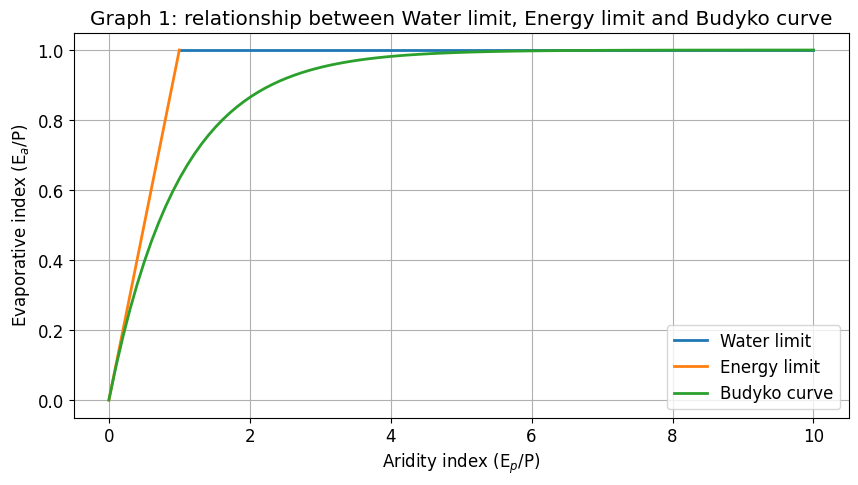

In [5]:
# Budyko curve 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12, 'lines.linewidth': 2})

def budyko(aridity):
    return (1-np.exp(-aridity))

aridity_val = np.linspace(0, 10, 100)
budyko_val = budyko(aridity_val)

fig = plt.figure(figsize=(10,5))
ax = plt.subplot(1,1,1)
ax.plot((1,10), (1,1), linewidth=2, label='Water limit')
ax.plot(np.linspace(0,1), np.linspace(0,1), linewidth = 2, label='Energy limit')
ax.plot(aridity_val, budyko_val, linewidth=2, label='Budyko curve')
ax.legend()
ax.set_xlabel(r'Aridity index (E$_p$/P)')
ax.set_ylabel(r'Evaporative index (E$_a$/P)')
plt.title("Graph 1: relationship between Water limit, Energy limit and Budyko curve")
plt.grid(True )  # Add grid lines
plt.show();

```{exercise-start} Budyko
:label: Budyko
```
The drought index ($D$) of an area is 1.3 and the annual rainfall is 700 mm/y.

According to the Budyko curve, what is a good estimate for the annual runoff coefficient ($\frac{\overline{Q}}{\overline{P}}$)?
 
```{exercise-end}
```

In [6]:
# Note that the code cell below is used for the website only

:::{dropdown} Answer&nbsp;{ref}`Budyko`

For $D = 1.3$ (*Aridity index* ($\frac{E_p}{P}$) in the x-axis of graph 1), we get a budyko value (*Evaporative index* ($\frac{E_a}{P}$) from y-axis of graph 1) of roughly: $0.727$. Thus the runoff coefficient can be now calculated:

$$
\frac{\overline{Q}}{\overline{P}} = C = 1 - (\frac{E_a}{P}) = 1 - 0.727 = 0.273
$$

:::

```{exercise-start} Budyko2
:label: Budyko2
```
For certain areas $A$ and $B$ data is known about potential evaporation and the drought index $D$:

| | $E_{pot}$ [mm/y] | $D$[-] | 
| ---- | --- | --- | 
| Area $A$ | 520 | 0.3 |
| Area $B$ | 1900 | 9.5 |

What is the absolute difference in average actual evaporation between the two areas according to the Budyko curve?
```{exercise-end}
```

In [7]:
# Note that the code cell below is used for the website only

:::{dropdown} Answer&nbsp;{ref}`Budyko2`

Given that: 


- $E_{p,A} = 520$
- $D_A = 0.3$
- $E_{p,B} = 1900$
- $D_B = 9.5$

Then the following applies: 

For area A: 

$$
P_A = \frac{E_{p,A}}{D_A} = 1733.33 \ \ [mm/y]
$$

For $D_A = 0.3$ (aridity index: ($\frac{E_p}{P}$)), we get a budyko value (evaporative index: ($\frac{E_a}{P}$)) of roughly: $0.259$. Thus average current evaporation for area A is given by: 

$$
E_{a,A} = P_A * (\frac{E_{a,A}}{P_A}) = 1733.33 * 0.259 = 449 \ \ [mm/y]
$$

For area B: 

$$
P_B = \frac{E_{p,B}}{D_B} = 200 \ \ [mm/y]
$$

For $D_B = 0.95$ (aridity index: ($\frac{E_p}{P}$)), we get a budyko value (evaporative index: ($\frac{E_a}{P}$)) of roughly: $1.00$. Thus average current evaporation for area B is given by: 

$$
E_{a,B} = P_B * (\frac{E_{a,B}}{P_B}) = 200 * 1.00 = 200 \ \ [mm/y]
$$

The difference in average current evaporation between the two areas is:

$$
E_{a,A}-E_{a,B} = 449 - 200 = 249 \ \ [mm/y]
$$

:::

## Penman equation:  open water evaporation/potential evaporation
There are several methods to calculate the evaporation of open water ($E_o$). The most well-known method to calculate open water evaporation $E_o$ is the method of Penman {cite:p}`Penman1948`, which has found worldwide application because it has a strong physical basis. Sometimes the Penman equation is also used to estimate potential evaporation and is purely based on four standard meteorological parameters:
- Net radiation (or at least sunshine hours);
- Wind velocity;
- Relative humidity;
- Air temperature.

The Penman equation is defined as:

$$
E_p \approx E_o=\frac{\displaystyle \bigg( \frac{sR_n}{\rho \lambda}+\frac{c_p\rho_a}{\rho \lambda} \cdot \frac{(e_s-e_a)}{r_a}\bigg) }{s+\gamma} 
\quad \text{[L/T]}
$$ (penman)

With:
| | | |
| --- | --- | --- | 
| $E_o$ | open water evaporation (actual) | [m/d] |
| $E_p$ | potential evaporation | [m/d] |
| $R_n$ | net radiation on the earth's surface | [J d$^{-1}$m$^{-2}$] |
| $\lambda$ | latent heat of vaporization ($\lambda$ = 2.45 MJ/kg ) | [J/kg] |
| $s$ | slope of the saturation vapour pressure-temperature curve (see equation {eq}`s`) | [kPa/K] |
| $c_p$ | specific heat of air at constant pressure (1004 J kg$^{-1}$ K$^{-1}$) | [J kg$^{-1}$ K$^{-1}$] |
| $\rho_a$ | density of air (1.205 kg/m$^3$) | [kg/m$^3$] |
| $\rho$ | density of water (1000 kg/m$^3$) | [kg/m$^3$] |
| $e_a$ | actual vapour pressure in the air at 2m height | [kPa] |
| $e_s$ | saturation vapour pressure for the air at 2m height | [kPa] |
| $\gamma$ | psychrometer constant (γ = 0.066 kPa/°C) | [kPa/K] |
| $r_a$ | aerodynamic resistance | [d/m] |

Notice that the unit of the radiation and the aerodynamic resistance should have similar time units. If $R_n$ is [J d$^{-1}$ m$^{-2}$] (thus per day), then $r_a$ should also be in [d/m]. If $R_n$ is given in [W/m$^{2}$ = J/s/m$^{2}$], then $r_a$ should be expressed in [s/m].

The left-hand side of the Penman equation describes the radiative forcing (via $R_n$), while the right-hand side describes the mechanical turbulence via the aerodynamic resistance $r_a$ and the available space the atmosphere has to 'store' water vapor ($e_s-e_a$). In the previous section, it was explained how the net radiation can be estimated, how $s$, $e_s$ and $e_a$ are dependent on temperature and humidity, and how to estimate the aerodynamic resistance based on wind speed.

In [9]:
# Note that the code cells below is used for the website only.

```{exercise-start} Penman
:label: Penman
```
In the following calculation, an estimate is made of the open-water evaporation in the Netherlands in the month of June. The following average 24-hour data are available:

- Air temperature ($T$): 15.5 °C  
- Relative humidity ($h$): 78%  
- Wind speed ($u_2$): 3.2 m/s    
- Number of actual hours of sunshine ($n_z$): 7.4
- Possible hours of sunshine ($N_z$): 17.4
- Extraterrestrial radiation ($R_a$): 16.6
- albedo for open water surface (r): 0.06

What is the open water evaporation in [mm/day]? 
 
```{exercise-end}
```



:::{dropdown} Answer&nbsp;{ref}`Penman`

First, calculate the saturated vapor pressure and slope of the vapor pressure curve (s).
For T<sub>a</sub> = 15.5 °C, the saturated vapor pressure is then: 

$$
e_s = 1.76 \ \ [kPa]
$$

For the slope ( s = <sup>de<sub>s</sub></sup>/<sub>dT</sub>), using the calculated e<sub>s</sub> and given T, this gives:

$$
s = 110 \ \ [Pa/°C] = 0.11 \ \ [kPa/°C]
$$

Then, calculate the actual vapor pressure (e<sub>a</sub>):

$$
e_a = h * e_s = 0.78 * 1.76 = 1.37 \ \ [kPa]
$$

Then, calculate the aerodynamic resistance (r<sub>a</sub>):

The aerodynamic resistance (r<sub>a</sub>) is a function of the wind speed at two meters height (u<sub>2</sub>). Using the units as those used in Penman equation we get:

$$
r_a = 1/86400 * 245 / (0.54*3.2+0.5) = 1.27 * 10^{-6} \ \ [day/mm] 
$$    

Due to local atmospheric conditions (e.g., smog) and cloudiness the amount of shortwave radiation entering the Earth’s surface is reduced, thus we will need to calculate the incoming shortwave radiation ($R_{s,in}) using:

$$
R_{s,in} / (\rho*\lambda_w) = (a_s + b_s \frac{n}{N}) * R_a = (0.2+0.55 \frac{7.4}{16.5}) * 16.6 = 7.415 \ \ [mm/day]
$$

The longwave radiation is estimated using {eq}`longwave_radiation`:

$$
R_B = R_{l,out} - R_{l,in}=  0.0049*(273+15.5)^4 * (0.47 - 0.21 * \sqrt{1.37}  ) * (0.2+0.8*0.45) = 4.26 \ \ [MJd^{-1}m^{-2}]
$$

The equivalent evaporation intensity is then divided by $\lambda_w*ρ = 2.45 [GJ/m^3]$: 

$$
R_B / (ρ*λ_w) = 1.74 \ \ [mm/day] 
$$

Thus, the net radiation intensity for open water with albedo (r = 0.06) is solved using:

$$
R_n / (ρ*λ_w) = (1-0.06) * 7.415 - 1.74 = 5.68 \ \ [mm/day]
$$

Using the Penman equation, the open water evaporation can now be calculated as follows:

$$
E_o = 
\frac{{0.11 \times 5.68 + \left( \frac{1004}{1000} \times \frac{1.205}{2450000} \right) \times \frac{1.76 - 1.37}{1.27 \times 10^{-6}}}}{{0.11 + 0.066}} = 4.41 \ \ [mm/day]
$$

:::

## Penman-Monteith equation: reference evaporation/potential evaporation
The Penman equation purely describes evaporation from any water surface. {cite:p}`Monteith1965` expanded the formula in such a way that it also included evaporation through the stomata (i.e., transpiration). He did this by including, next to the aerodynamic resistance, a crop resistance. The crop resistance, $r_c$, mimics the opening and closing of the stomata. It is dependent on solar radiation, temperature, vapor pressure deficit, and leaf water potential. Including the crop resistance transforms the Penman equation into the Penman-Monteith equation:

$$
E_{p}=\frac{\displaystyle \bigg( \frac{sR_n}{\rho \lambda}+\frac{c_p \rho_a}{\rho \lambda } \cdot \frac{(e_s-e_a)}{r_a}\bigg) }{s+\gamma \bigg(1+\frac{r_c}{r_a}\bigg)} 
\quad \text{[L/T]}
$$ (transpiration)

The crop resistance can be found in literature or can be estimated through a model (e.g., {cite:t}`jarvis-1976`). However, it remains an uncertain parameter. Therefore in practice, often the reference evaporation is {cite:p}`allen-1998`. The reference evaporation is defined as the Penman-Monteith evaporation from an idealized grass crop with a fixed crop height of 0.12m, an albedo of 0.23 and a $r_c$=70 s/m:

$$
E_{ref, grass}=E_{p|r_c=70s/m} \quad
\text{[L/T]}
$$ (refevaporation)



## Makkink equation: reference evaporation/potential evaporation
Studies have shown that for Dutch circumstances the Penman-Monteith equation can be modeled with a simpler formula which gives equal results or better results {cite:p}`debruin-1988`. The KNMI has been using Makkink's formula since 1987 and has provided the so-called $E_{ref}$. 

Makkink (1957) assumed that the radiation term $R_{s,in}$ is the most important term in the Penman equation (the Makkink method is also called the 'radiation method'). Makkink proposed a simplification with only two required data sets: radiation intensity and temperature. The advantage of using the Makkink method compared to the Penman-Monteith method is therefore the limited meteorological data that should be measured. 

Makkink's formula:

$$
E_{ref}=C_e \frac{s}{s+\gamma}\cdot \frac{R_{s,in}}{\rho \lambda}
\quad \text{[L/T]}
$$ (makkink)

With:

| | | |
| --- | --- | --- | 
| $C_e$ | empirical constant, 0.65 in the Netherlands | [-] |  
| $s$ | slope of the vapour pressure curve | [kPa/°C] |
| $\gamma$ | psychrometer constant, 0.066 kPa/°C | [kPa/°C] |
| $\lambda$ | heat of vaporization, 2.45 | [MJ/kg] |
| $R_{s,in}$ | incoming short wave radiation | [J d$^{-1}$ m$^{-2}$] |

The daily reference evaporation by Makkink is the maximum possible evaporation of short grass (5-15cm) during the summer period with a good water supply. The reference evaporation according to Makkink is often used to determine the potential evaporation of grass (see equation {eq}`makkink`).

